In [120]:

import matplotlib.pyplot as plt
import json
import pandas as pd
import seaborn as snsxlim
import numpy as np

In [130]:
dataset='MNIST'
loss='softmax'

In [133]:
dfs = [[],[]]
titles = [[],[]]
for i, dataset in enumerate(['MNIST','CIFAR100']):
    for loss in ['softmax','sparsemax']:
        titles[i].append(f'{dataset} {loss}')
        with open(f'results/{dataset}_{loss}_results.json', 'r') as f:
            dfs[i].append(pd.DataFrame(json.load(f)))

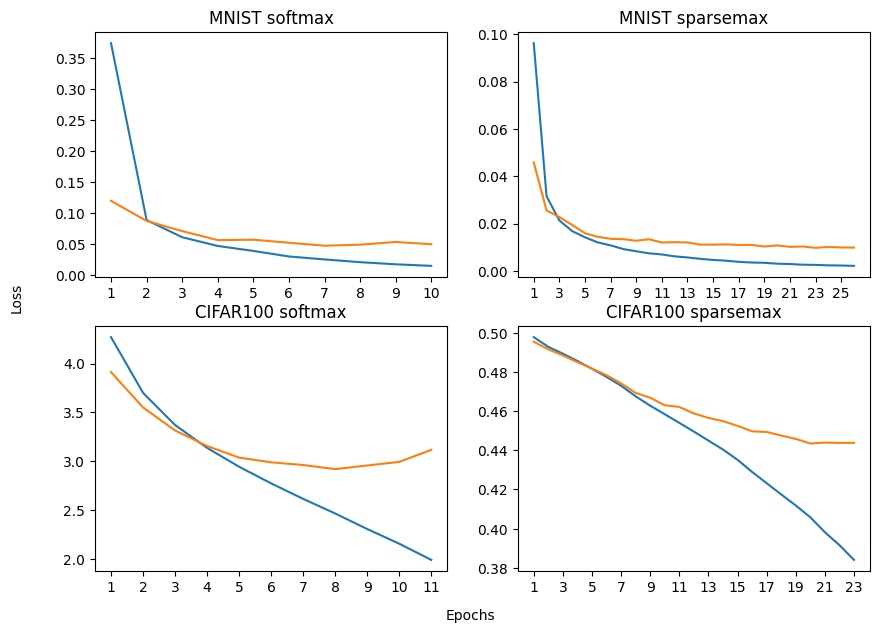

In [134]:
fig, axs = plt.subplots(2,2, figsize=(10,7))
for i,datasets in enumerate(dfs):
    for j, df in enumerate(datasets):
        if i==0 and j==1:
            legend=True
        else:
            legend=False
        axs[i,j].title.set_text(titles[i][j])
        df.index += 1 
        axs[i,j].set_xticks(np.arange(1,df.shape[0]+1,df.shape[0]//10))
        # axs[i,j].set_ylim([0,1.2*df[['train_history','val_history']].max().max()])
        axs[i,j].plot(df[['train_history','val_history']])
        # df[['train_history','val_history']].plot(+1ax=axs[i,j], legend=legend)
fig.text(0.5, 0.04, 'Epochs', ha='center')
fig.text(0.04, 0.5, 'Loss', va='center', rotation='vertical')
plt.savefig(f'results/classification_loss.png')